In [2]:
# fetch the data off the ONS website
# got from https://www.ons.gov.uk/businessindustryandtrade/constructionindustry/datasets/outputintheconstructionindustry/current
import urllib.request

furl = "https://www.ons.gov.uk/file?uri=/businessindustryandtrade"+\
       "/constructionindustry/datasets/outputintheconstructionindustry"+\
       "/current/previous/v26/constructionoutputmay2017correction.xls"
        
req = urllib.request.Request(furl, headers={'User-Agent' : "Sensible code"}) 
xp = urllib.request.urlopen(req).read()
fout = open("constructiondata.xls", "wb")
fout.write(xp)
fout.close()
print("file size", len(xp), "bytes")

file size 1023488 bytes


In [207]:
from databaker.framework import *
# (loads messytables loads pdf.py and raises an exception because pdf.get_tables does not exist, but who cares?)
tabs = loadxlstabs("constructiondata.xls")
tab = tabs[6]
print(tab.name)


Loading constructiondata.xls which has size 1023488 bytes
Table names: ['Correction Notice', 'Cover Sheet', 'Contents', 'Table 1a', 'Table 1b', 'Table 2a', 'Table 2b', 'Table 3a', 'Table 3b', 'Table 3c', 'Table 3d', 'Table 4', 'Table 4a', 'Table 5', 'Table 6', 'Table 7a', 'Table 7b', 'Table 9a', 'Table 10', 'Table 11', 'Table 12', 'Table 13', 'Table 14']
Table 2b


In [211]:
tab = tabs[6]
jan = tab.filter("Jan")
jan = jan.by_index(1)
pubhousing = jan.shift(RIGHT).expand(DOWN)
prihousing = pubhousing.shift(RIGHT)

month = pubhousing.shift(LEFT)
year = month.shift(LEFT)
savepreviewhtml([pubhousing, prihousing, month, year], "preview.html")



tablepart 'Table 2b' written #injblock1007


/home/goatchurch/sensiblecode/royalstats/preview.html

In [226]:
vpubhousing = [k.value  for k in pubhousing]
vprihousing = [k.value  for k in prihousing]


month = pubhousing.shift(LEFT)
year = month.shift(LEFT)
monthdates = [ ]
for m, y in zip(month, year):
    monthdates.append(m.value.strip()+" "+(str(y.value)[:4] if y.value else monthdates[-1][-4:]))

datecol = pandas.to_datetime(monthdates)
pandas.DataFrame([vpubhousing, vprihousing])
d = pandas.DataFrame({"pub":vpubhousing, "pri":vprihousing})
d = d.set_index(datecol)



,pri,pub
2010-01-01,851.0,260.0
2010-02-01,1040.0,366.0
2010-03-01,1255.0,392.0
2010-04-01,1255.0,377.0
2010-05-01,1297.0,396.0
2010-06-01,1394.0,410.0
2010-07-01,1344.0,412.0
2010-08-01,1367.0,433.0
2010-09-01,1429.0,427.0
2010-10-01,1492.0,437.0


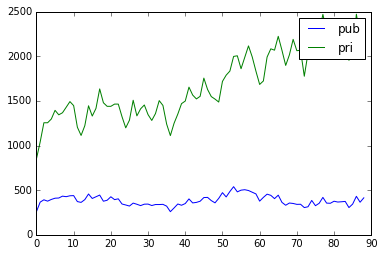

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(vpubhousing, label="pub")
plt.plot(vprihousing, label="pri")
plt.legend()

In [228]:
help(scipy.stats.stats.tmean)

Help on function tmean in module scipy.stats.stats:

tmean(a, limits=None, inclusive=(True, True), axis=None)
    Compute the trimmed mean.
    
    This function finds the arithmetic mean of given values, ignoring values
    outside the given `limits`.
    
    Parameters
    ----------
    a : array_like
        Array of values.
    limits : None or (lower limit, upper limit), optional
        Values in the input array less than the lower limit or greater than the
        upper limit will be ignored.  When limits is None (default), then all
        values are used.  Either of the limit values in the tuple can also be
        None representing a half-open interval.
    inclusive : (bool, bool), optional
        A tuple consisting of the (lower flag, upper flag).  These flags
        determine whether values exactly equal to the lower or upper limits
        are included.  The default value is (True, True).
    axis : int or None, optional
        Axis along which to compute test. Defa

In [227]:
# check we know how to do the mean and standard deviation of a set of numbers
import math
v = vprihousing
scipy.stats.stats.tstd(v)
m = scipy.stats.stats.tmean(v)
s = scipy.stats.stats.tstd(v)
sum(v)/len(v), m

math.sqrt(sum([(k-m)**2  for k in v])/(len(v)-1)), s

(393.90148220247596, 393.90148220247596)

In [232]:
import numpy as np
#help(np.histogram)
np.histogram(v)

(array([ 1,  3, 13, 22, 10,  6,  5, 14, 10,  5]),
 array([  851.,  1013.,  1175.,  1337.,  1499.,  1661.,  1823.,  1985.,
         2147.,  2309.,  2471.]))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3053081240>]], dtype=object)

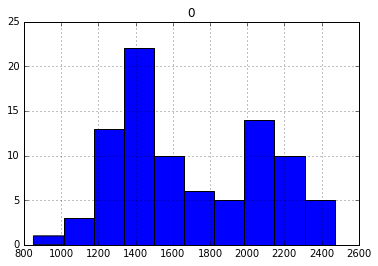

In [235]:
# check if we know how to plot a histogram
# deprecated shows how it's closed down
#help(scipy.stats.histogram2)
#plt.plot(scipy.stats.histogram(v))
import numpy
a, b = numpy.histogram(v)
#plt.bar(b[:-1], a, width=100)

import pandas as pd
pd.DataFrame(v).hist()

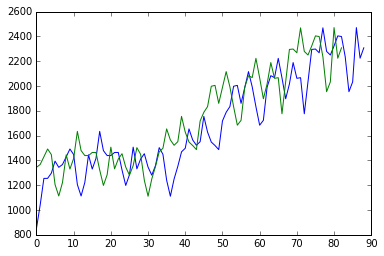

In [238]:
# now look at autocorrelation plot shifted by 12
plt.plot(vprihousing)
plt.plot(vprihousing[6:])


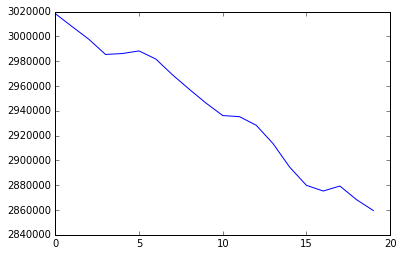

In [239]:
# demonstrate autocorrelation measure
import random, math
#v = [random.gauss(0,1) + 1*math.sin(math.radians(i/12*360))  for i in range(100)]
s = [ sum(x*y  for x, y in zip(v[a:], v))/(len(v)-a)  for a in range(20) ]
plt.plot(s)


NormaltestResult(statistic=14.279820971307094, pvalue=0.00079282306232846781)

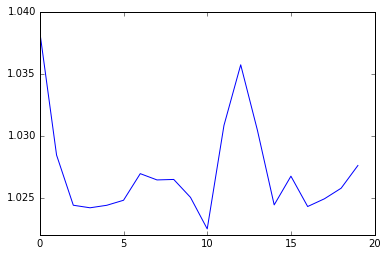

In [246]:
# autocorrelation using the ratio change between values
v = [a/b  for a, b in zip(vprihousing[1:], vprihousing)]
#plt.plot(v)
s = [ sum(x*y  for x, y in zip(v[a:], v))/(len(v)-a)  for a in range(20) ]
plt.plot(s)
scipy.stats.normaltest(vprihousing, nan_policy='omit')


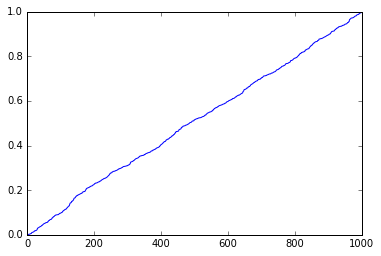

In [297]:
ps.sort()
plt.plot(ps)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f305150a7f0>]], dtype=object)

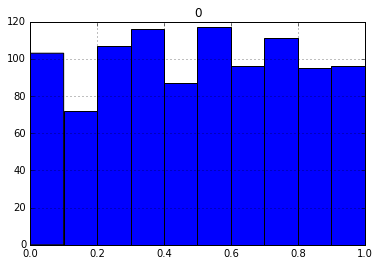

In [296]:
import random
ps = [ ]
for j in range(1000):
    s = [ random.gauss(5,10)  for i in range(len(vprihousing)) ]
    q = scipy.stats.normaltest(s, nan_policy='omit')
    ps.append(q.pvalue)
pd.DataFrame(ps).hist()

In [311]:
# http://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html#statsmodels.tsa.seasonal.seasonal_decompose
import statsmodels.tsa.seasonal
import statsmodels.tsa.arima_process

statsmodels.tsa.seasonal.seasonal_decompose
help(statsmodels.tsa.arima_process)
h = statsmodels.tsa.seasonal.seasonal_decompose(vprihousing, freq=12)

Help on module statsmodels.tsa.arima_process in statsmodels.tsa:

NAME
    statsmodels.tsa.arima_process - ARMA process and estimation with scipy.signal.lfilter

DESCRIPTION
    2009-09-06: copied from try_signal.py
        reparameterized same as signal.lfilter (positive coefficients)
    
    
    Notes
    -----
    * pretty fast
    * checked with Monte Carlo and cross comparison with statsmodels yule_walker
      for AR numbers are close but not identical to yule_walker
      not compared to other statistics packages, no degrees of freedom correction
    * ARMA(2,2) estimation (in Monte Carlo) requires longer time series to estimate parameters
      without large variance. There might be different ARMA parameters
      with similar impulse response function that cannot be well
      distinguished with small samples (e.g. 100 observations)
    * good for one time calculations for entire time series, not for recursive
      prediction
    * class structure not very clean yet
    * m

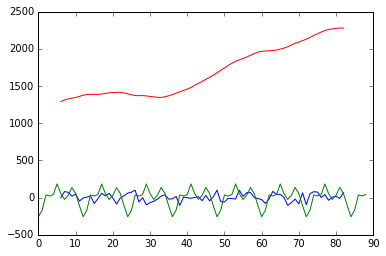

In [303]:
plt.plot(h.resid)
plt.plot(h.seasonal)
plt.plot(h.trend)


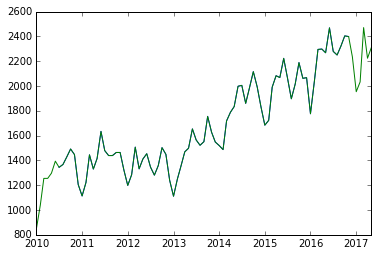

In [308]:
plt.plot(datecol, h.resid + h.seasonal+ h.trend)
plt.plot(datecol, vprihousing)


0 1.0231591448931117
1 1.155542658154382
2 1.0462079357106981
3 0.9927988478156505
4 1.0749516441005802
5 0.9293747188484031
6 0.9181994191674734
7 1.062730627306273
8 1.085813492063492
9 0.9419826404751028
10 1.0024248302618817
11 0.8592162554426706


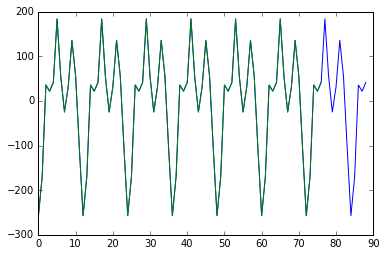

In [320]:
v = h.seasonal
#s = [ sum(x*y  for x, y in zip(v[a:], v))/(len(v)-a)  for a in range(20) ]
plt.plot(h.seasonal)
plt.plot(h.seasonal[12:])
#plt.plot(h.resid)

for i in range(12):
    print(i, vprihousing[60+i+1]/vprihousing[60+i])


NormaltestResult(statistic=1.9897597636837026, pvalue=0.36976785771060228)

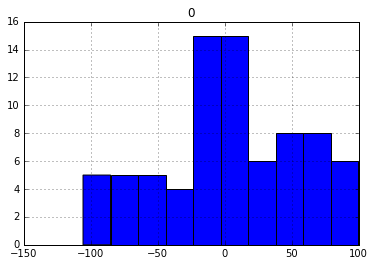

In [304]:
import numpy
hr = h.resid[6:-6]
a, b = numpy.histogram(hr)
#plt.bar(b[:-1], a, width=10)
pd.DataFrame(h.resid).hist()
scipy.stats.normaltest(v)


In [125]:
# check for normality
scipy.stats.normaltest(h.resid, nan_policy='omit')


NormaltestResult(statistic=2.0042709636639557, pvalue=0.36709467952880559)

NormaltestResult(statistic=2.1591109190676461, pvalue=0.33974652315798676)

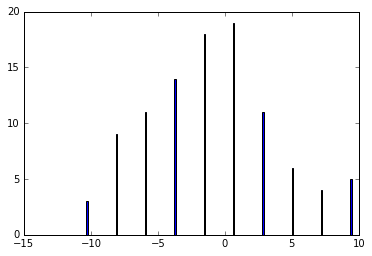

In [197]:
# generate random data
j = [ random.gauss(0,5)  for i in range(100) ]
a, b = numpy.histogram(j)
plt.bar(b[:-1], a, width=0.1)
scipy.stats.normaltest(j, nan_policy='omit')



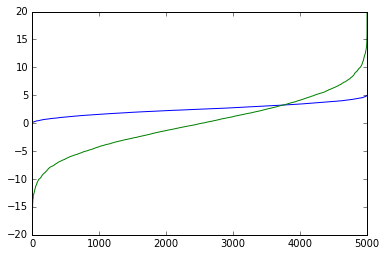

In [206]:
j = [ random.triangular(0,5)  for i in range(5000) ]
j.sort()
plt.plot(j)
j = [ random.gauss(0,5)  for i in range(5000) ]
j.sort()
plt.plot(j)